<a href="https://colab.research.google.com/github/aearevalor/curso-estadistica-multivariante/blob/master/MANCHAS_DE_CHOCOLATE_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar datos

In [144]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras import layers, models
from keras.layers.advanced_activations import PReLU
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback 
from google.colab import drive
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


###Identificar si nos encontramos conectados a una GPU de Google

In [3]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU no encontrada')
print('Encontrada GPU: {}'.format(device_name))

Encontrada GPU: /device:GPU:0


##Montage y carga de directorio de fotos a COLAB

In [4]:
drive.mount('/content/gdrive')
data=!unzip '/content/gdrive/MyDrive/Fotos/FOTOS CLASIFICADAS FINALES2.zip'
!ls data_dir '/content/FOTOS CLASIFICADAS FINALES'

Mounted at /content/gdrive
ls: cannot access 'data_dir': No such file or directory
'/content/FOTOS CLASIFICADAS FINALES':
0  1  2  3  4


In [5]:
#from google.colab import files
#uploaded = files.upload()

In [6]:
#import zipfile
#import io
#data = zipfile.ZipFile(io.BytesIO(uploaded['dataset.zip']), 'r')
#data.extractall()

###Preprocesamiento de imagenes (definir si es necesario cambiar los canales RGB)

In [7]:
height, width = 224,224

In [8]:
route0="/content/FOTOS CLASIFICADAS FINALES/0"
route0
list0=[]


for img in os.listdir(route0):
  img=cv2.imread(os.path.join(route0,img))
  resize=cv2.resize(img,(height, width))
  color = cv2.cvtColor(resize, cv2.COLOR_BGR2RGB)
  list0.append(color)
  
  
train0=np.array(list0)
print(train0.shape)


(272, 224, 224, 3)


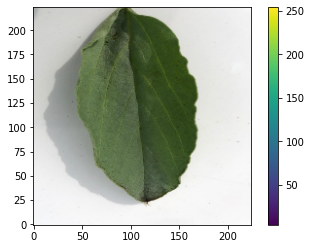

(224, 224, 3)


In [9]:
plt.figure()
plt.imshow(list0[50],  origin='lower')
plt.colorbar()
plt.show()
print(list0[50].shape)

In [10]:
route1="/content/FOTOS CLASIFICADAS FINALES/1"
list1=[]


for img in os.listdir(route1):
  img=cv2.imread(os.path.join(route1,img))
  resize=cv2.resize(img,(height, width))
  color = cv2.cvtColor(resize, cv2.COLOR_BGR2RGB)
  list1.append(color)
  
  
train1=np.array(list1)
print(train1.shape)


(296, 224, 224, 3)


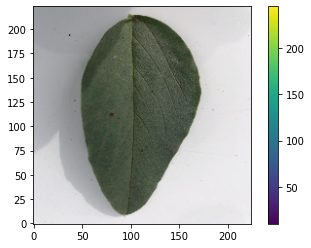

(224, 224, 3)


In [11]:
plt.figure()
plt.imshow(list1[100],  origin='lower')
plt.colorbar()
plt.show()
print(list1[100].shape)

In [12]:
route2="/content/FOTOS CLASIFICADAS FINALES/2"
list2=[]


for img in os.listdir(route2):
  img=cv2.imread(os.path.join(route2,img))
  resize=cv2.resize(img,(height, width))
  color = cv2.cvtColor(resize, cv2.COLOR_BGR2RGB)
  list2.append(color)
  
  
train2=np.array(list2)
print(train2.shape)

(177, 224, 224, 3)


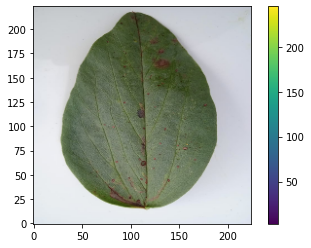

(224, 224, 3)


In [13]:
plt.figure()
plt.imshow(list2[100],  origin='lower')
plt.colorbar()
plt.show()
print(list2[100].shape)

In [14]:
route3="/content/FOTOS CLASIFICADAS FINALES/3"
list3=[]


for img in os.listdir(route3):
  img=cv2.imread(os.path.join(route3,img))
  resize=cv2.resize(img,(height, width))
  color = cv2.cvtColor(resize, cv2.COLOR_BGR2RGB)
  list3.append(color)
  
  
train3=np.array(list3)
print(train3.shape)

(190, 224, 224, 3)


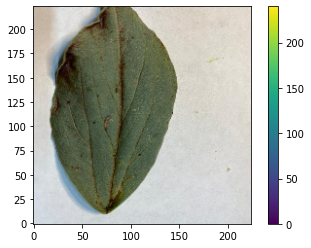

(224, 224, 3)


In [15]:
plt.figure()
plt.imshow(list3[100],  origin='lower')
plt.colorbar()
plt.show()
print(list3[100].shape)

In [16]:
route4="/content/FOTOS CLASIFICADAS FINALES/4"
list4=[]


for img in os.listdir(route4):
  img=cv2.imread(os.path.join(route4,img))
  resize=cv2.resize(img,(height, width))
  color = cv2.cvtColor(resize, cv2.COLOR_BGR2RGB)
  list4.append(color)
  
  
train4=np.array(list4)
print(train4.shape)

(226, 224, 224, 3)


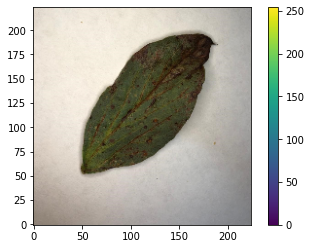

(224, 224, 3)


In [17]:
plt.figure()
plt.imshow(list4[100],  origin='lower')
plt.colorbar()
plt.show()
print(list4[100].shape)

# Procesamiento de imagenes

In [18]:
data_dir = '/content/FOTOS CLASIFICADAS FINALES'
batch_size = 32
epochs = 30 # Modificar epocas

###Preprocesamiento y aumento de imagenes de entrenamiento

Se busca realizar diferentes conversiones a las imagenes de entrenamiento para evitar overfitting

In [19]:
train_datagen=ImageDataGenerator(
    #rescale = 1./255,
    rotation_range = 45,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    brightness_range=[0.5,1.5],
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'constant',
    validation_split=0.2    
    )

val_datagen = ImageDataGenerator(
    #rescale=1./255, 
    validation_split=0.2
    )


In [20]:
#i = 0
#for batch in train_datagen.flow_from_directory(data_dir, target_size=(height,width),
    #class_mode='categorical', shuffle=False, batch_size=batch_size,
    #save_to_dir='/content/gdrive/MyDrive/Augmented', save_prefix='Ag'):

    #i += 1
    #if i > 10: # save 10 images
        #break  # otherwise the generator would loop indefinitely

##Procesamiento de imagenes

Se busca establecer dos set, uno como entrenamiento del modelo y el otro como validación del modelo

In [21]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    seed=10,
    target_size = (height, width),
    class_mode='categorical',
    batch_size = batch_size,
    subset='training'
)
validation_generator = val_datagen.flow_from_directory(
    data_dir,
    seed=10,
    target_size = (height, width),
    class_mode='categorical',
    batch_size = batch_size,
    subset='validation'
    #save_to_dir = 'C:/Users/omare' + 'aug'
)

Found 930 images belonging to 5 classes.
Found 231 images belonging to 5 classes.


In [22]:
class_names = []
index = train_generator.class_indices
for row in index:
        class_names.append(row[0])
print(class_names)

['0', '1', '2', '3', '4']


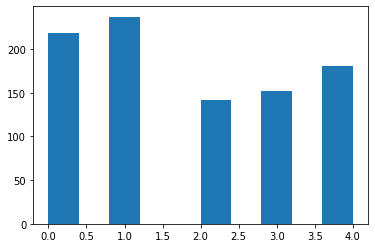

In [23]:
plt.hist(train_generator.classes)
plt.show()

# Creación del modelo
##Ajuste del modelo preentrenado

Se busca realizar el ajuste de las capas del modelo seleccionado para el procesamiento de imagenes

In [24]:
#Inputs used: normalization_layer or input_shape(height, length, 3 )
#Model creation
#input_shape = (height,width,3)

#model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = input_shape),
#                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
#                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
#                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
#                                   tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
#                                   tf.keras.layers.MaxPool2D(2,2),
                                    #
#                                   tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
#                                   tf.keras.layers.MaxPool2D(2,2),
                                    ##
#                                   tf.keras.layers.Flatten(),
                                    ##
#                                   tf.keras.layers.Dense(512,activation = PReLU()),
                                    ##
#                                   tf.keras.layers.Dense(5,activation = 'softmax')
#                                   ])

#model.summary()

In [34]:
pretrained = Xception(weights= 'imagenet',
                        include_top=False,
                        input_shape=(height, width, 3))
                        
pretrained.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [33]:
# Orden de las capas 
for layer in pretrained.layers:
    print(layer.name)

input_1
block1_conv1
block1_conv1_bn
block1_conv1_act
block1_conv2
block1_conv2_bn
block1_conv2_act
block2_sepconv1
block2_sepconv1_bn
block2_sepconv2_act
block2_sepconv2
block2_sepconv2_bn
conv2d
block2_pool
batch_normalization
add
block3_sepconv1_act
block3_sepconv1
block3_sepconv1_bn
block3_sepconv2_act
block3_sepconv2
block3_sepconv2_bn
conv2d_1
block3_pool
batch_normalization_1
add_1
block4_sepconv1_act
block4_sepconv1
block4_sepconv1_bn
block4_sepconv2_act
block4_sepconv2
block4_sepconv2_bn
conv2d_2
block4_pool
batch_normalization_2
add_2
block5_sepconv1_act
block5_sepconv1
block5_sepconv1_bn
block5_sepconv2_act
block5_sepconv2
block5_sepconv2_bn
block5_sepconv3_act
block5_sepconv3
block5_sepconv3_bn
add_3
block6_sepconv1_act
block6_sepconv1
block6_sepconv1_bn
block6_sepconv2_act
block6_sepconv2
block6_sepconv2_bn
block6_sepconv3_act
block6_sepconv3
block6_sepconv3_bn
add_4
block7_sepconv1_act
block7_sepconv1
block7_sepconv1_bn
block7_sepconv2_act
block7_sepconv2
block7_sepconv2_

In [ ]:
#Entrenar las ultimas 3 capas convolucionales del modelo preexistente nuevamente
pretrained.trainable = True

set_trainable = False
for layer in pretrained.layers:
    if layer.name in ['block14_sepconv2']:
        layer.trainable = True
    else:
        layer.trainable = False
        
pretrained.summary() 

In [35]:
input_shape = (None,height,width,3)

model = models.Sequential()
model.add(pretrained)        # modelo base agregado como una capa!
model.add(layers.Flatten())
model.add(layers.Dense(256, activation= 'relu'))
model.add(layers.Dropout(0.6))  # a ver
model.add(layers.Dense(5, activation='softmax'))
model.build(input_shape)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1285      
Total params: 46,553,133
Trainable params: 46,498,605
Non-trainable params: 54,528
_________________________________________________________________


In [36]:
#Optimizers used SGD & RMSprop
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(learning_rate =5e-3), #Modificar los pasos
              metrics = ['accuracy'])

In [37]:
early_stop = EarlyStopping(monitor='val_loss', patience=20, 
                           verbose=1, min_delta=1e-4)  
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                              patience=10, verbose=1, 
                              mode="auto", min_delta=1e-6)  
callbacks_list = [early_stop, reduce_lr]  

In [31]:
#model.reset_states()
#model.reset_metrics()

In [38]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = epochs,
    callbacks=callbacks_list)

Epoch 1/30
29/29 [==============================] - 38s 1s/step - loss: 1.7149 - accuracy: 0.3419 - val_loss: 1.6930 - val_accuracy: 0.2589
Epoch 2/30
29/29 [==============================] - 33s 1s/step - loss: 1.3158 - accuracy: 0.4752 - val_loss: 1.9451 - val_accuracy: 0.4062
Epoch 3/30
29/29 [==============================] - 32s 1s/step - loss: 1.1515 - accuracy: 0.5134 - val_loss: 1.8212 - val_accuracy: 0.5179
Epoch 4/30
29/29 [==============================] - 32s 1s/step - loss: 1.0572 - accuracy: 0.5869 - val_loss: 1.3526 - val_accuracy: 0.5625
Epoch 5/30
29/29 [==============================] - 32s 1s/step - loss: 0.9362 - accuracy: 0.6325 - val_loss: 1.2876 - val_accuracy: 0.5759
Epoch 6/30
29/29 [==============================] - 32s 1s/step - loss: 0.8770 - accuracy: 0.6392 - val_loss: 1.3451 - val_accuracy: 0.5759
Epoch 7/30
29/29 [==============================] - 32s 1s/step - loss: 0.8696 - accuracy: 0.6548 - val_loss: 1.2487 - val_accuracy: 0.6161
Epoch 8/30
29/29 [==

In [55]:
from google.colab import files
test = files.upload()

Saving test.zip to test.zip


In [57]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(test['test.zip']), 'r')
data.extractall()

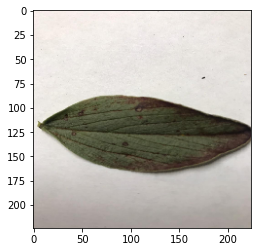

this leaf is classified as 4 (major damage) in Cobbs classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


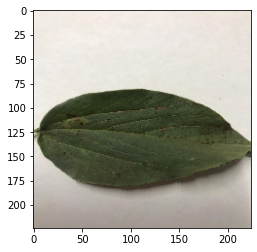

this leaf is classified as 4 (major damage) in Cobbs classification


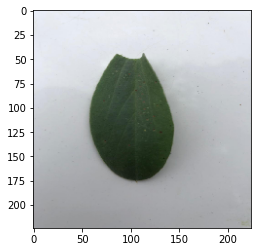

this leaf is classified as 4 (major damage) in Cobbs classification


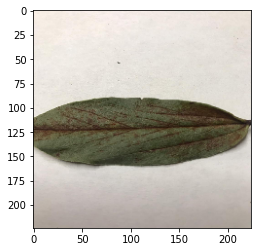

this leaf is classified as 4 (major damage) in Cobbs classification


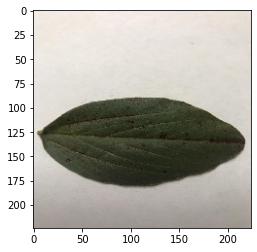

this leaf is classified as 4 (major damage) in Cobbs classification


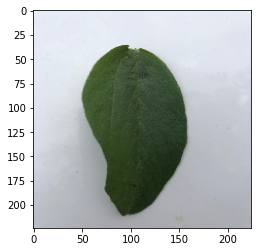

this leaf is classified as 4 (major damage) in Cobbs classification


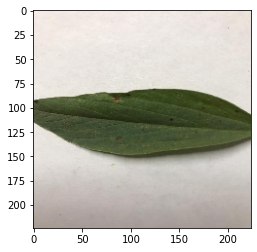

this leaf is classified as 4 (major damage) in Cobbs classification


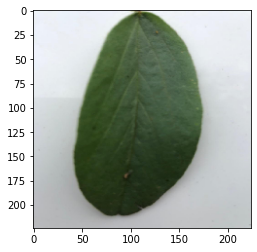

this leaf is classified as 4 (major damage) in Cobbs classification


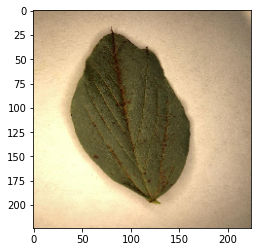

this leaf is classified as 4 (major damage) in Cobbs classification


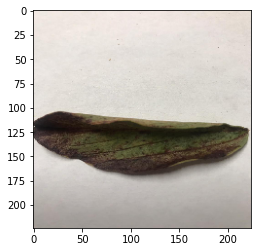

this leaf is classified as 4 (major damage) in Cobbs classification


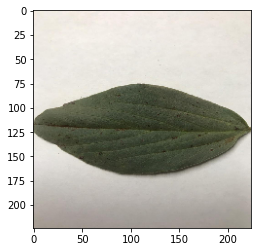

this leaf is classified as 4 (major damage) in Cobbs classification


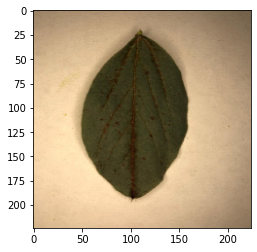

this leaf is classified as 4 (major damage) in Cobbs classification


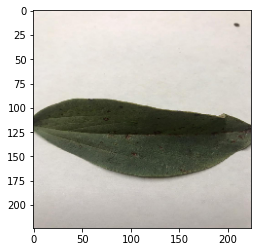

this leaf is classified as 4 (major damage) in Cobbs classification


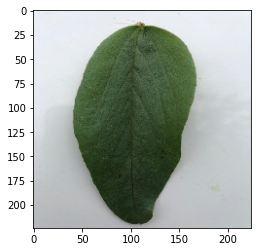

this leaf is classified as 4 (major damage) in Cobbs classification


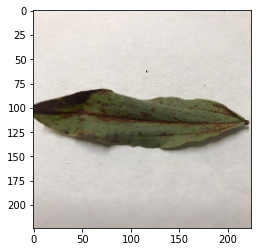

this leaf is classified as 4 (major damage) in Cobbs classification


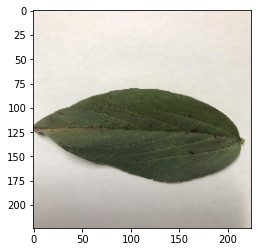

this leaf is classified as 4 (major damage) in Cobbs classification


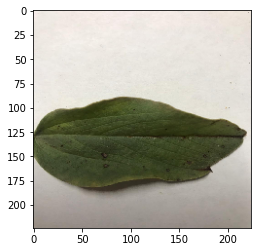

this leaf is classified as 4 (major damage) in Cobbs classification


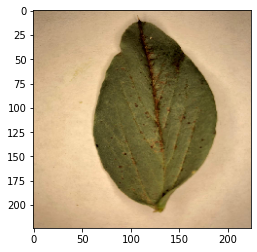

this leaf is classified as 4 (major damage) in Cobbs classification


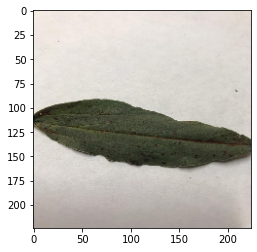

this leaf is classified as 4 (major damage) in Cobbs classification


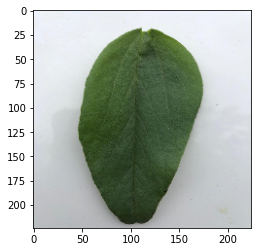

this leaf is classified as 4 (major damage) in Cobbs classification


In [60]:


for i in os.listdir(dirPath):
    img = image.load_img(dirPath + '//' + i, target_size= (height, width))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis= 0)
    images = np.concatenate([X])
    val = model.predict(images)
    if val == "0":
     print('this leaf is classified as 0 (healthy) in Cobbs classification')
    if val == '1':
     print('this leaf is classified as 1 (minor damage) in Cobbs classification')
    if val == '2':
     print('this leaf is classified as 2 (minor-medium damage) in Cobbs classification')
    if val == '3':
     print('this leaf is classified as 3 (medium damage) in Cobbs classification')
    else:
     print('this leaf is classified as 4 (major damage) in Cobbs classification')
   


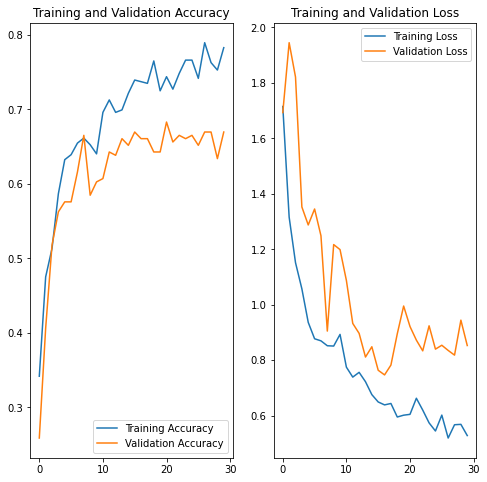

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
train_loss = model.evaluate(train_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=2)
print('\nTrain loss:', train_loss)

validation_loss = model.evaluate(validation_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=2)
print('\nValidation loss:', validation_loss)

30/30 - 23s - loss: 0.4225 - accuracy: 0.8215

Train loss: [0.4225415587425232, 0.8215053677558899]
8/8 - 4s - loss: 0.8749 - accuracy: 0.6580

Validation loss: [0.874859631061554, 0.6580086350440979]


In [ ]:
model.save('modelInception1e-3.h5')

In [99]:
pred = model.predict(validation_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)  
predicted = np.argmax(pred, axis=1)  

8/8 [==============================] - 3s 391ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


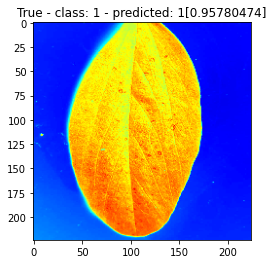

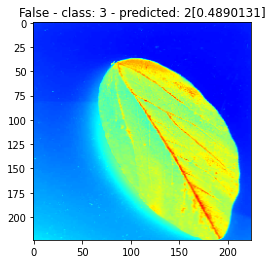

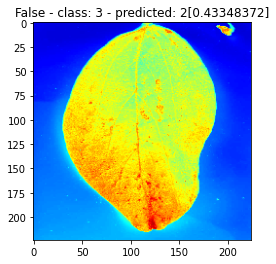

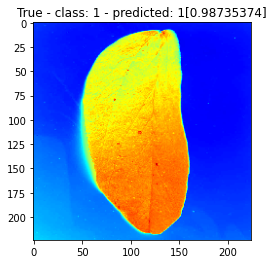

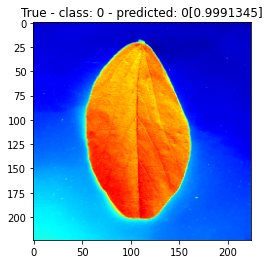

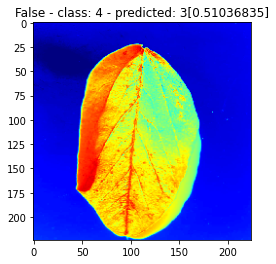

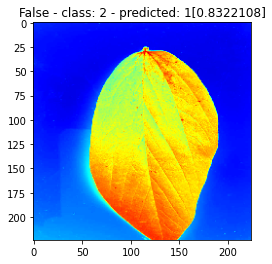

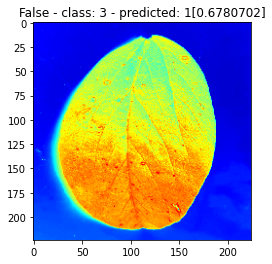

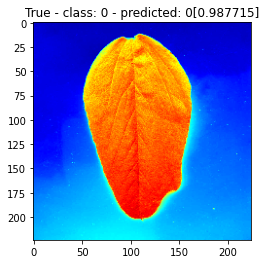

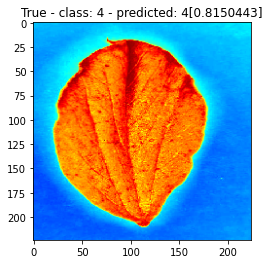

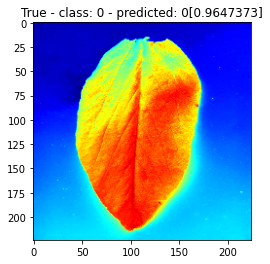

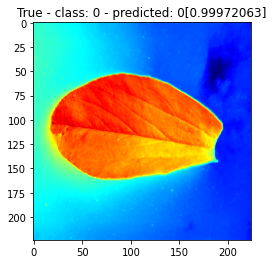

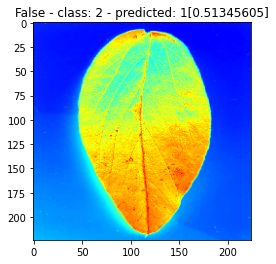

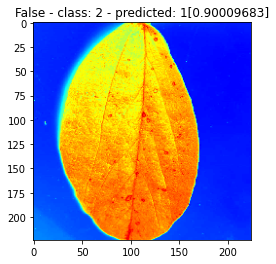

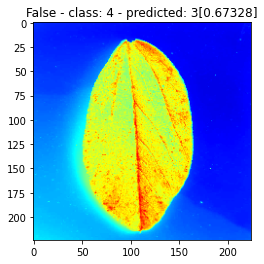

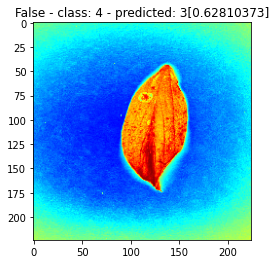

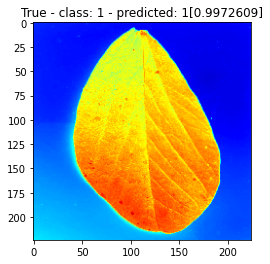

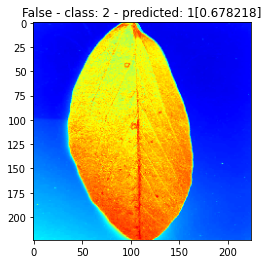

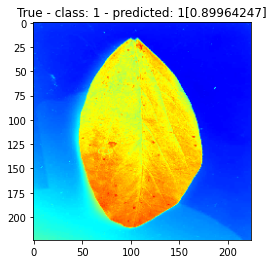

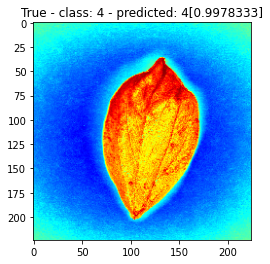

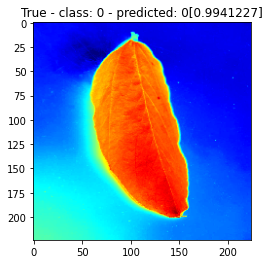

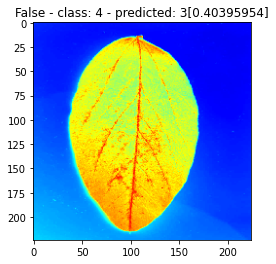

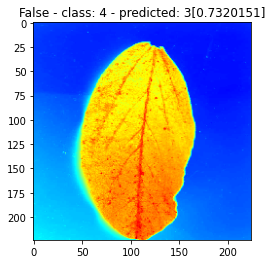

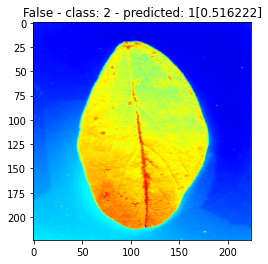

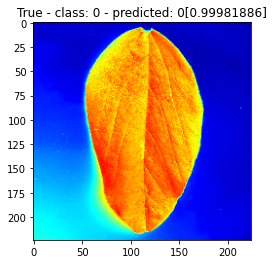

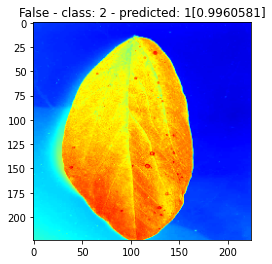

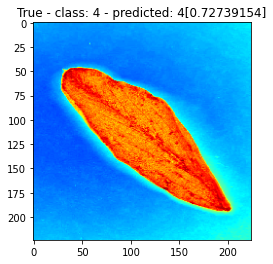

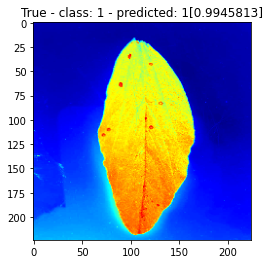

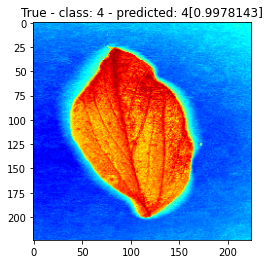

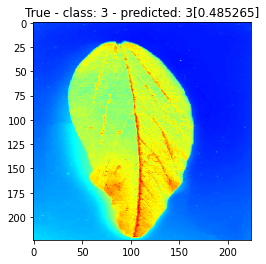

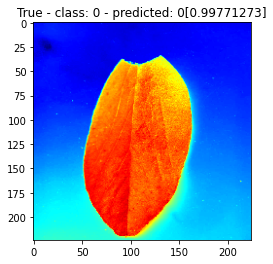

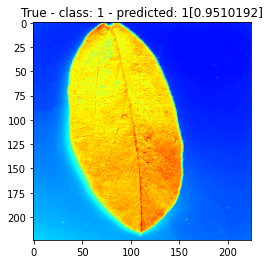

In [320]:
def predict_one(model):  
    image_batch, classes_batch = next(validation_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0]):
      image = image_batch[k]
      image = image.astype(np.uint8)
      #image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
      image = cv2.applyColorMap(image, cv2.COLORMAP_AUTUMN)
      #image = cv2.addWeighted(image2, 0.9, image1, 1, 0)
      pred = predicted_batch[k]
      the_pred = np.argmax(pred)
      predicted = class_names[the_pred]
      val_pred = max(pred)
      the_class = np.argmax(classes_batch[k])
      value = class_names[np.argmax(classes_batch[k])]
      plt.figure(k)
      isTrue = (the_pred == the_class)
      plt.title(str(isTrue) + ' - class: ' + value + ' - ' + 'predicted: ' + predicted + '[' + str(val_pred) + ']')
      
      plt.imshow(image)



predict_one(model)  

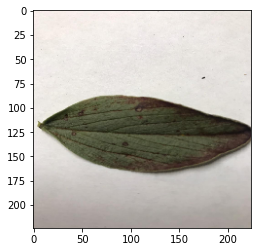

This image most likely belongs to 0 with a 40.38 percent confidence.


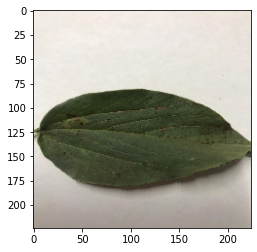

This image most likely belongs to 0 with a 40.38 percent confidence.


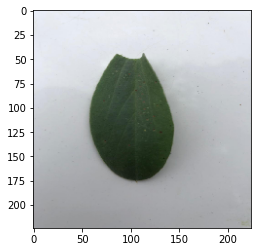

This image most likely belongs to 0 with a 40.38 percent confidence.


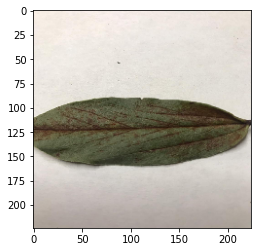

This image most likely belongs to 0 with a 40.38 percent confidence.


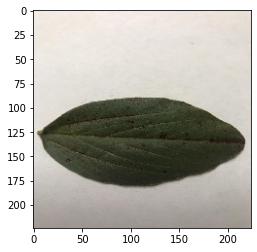

This image most likely belongs to 0 with a 40.38 percent confidence.


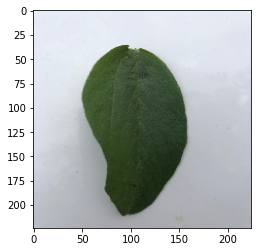

This image most likely belongs to 0 with a 40.38 percent confidence.


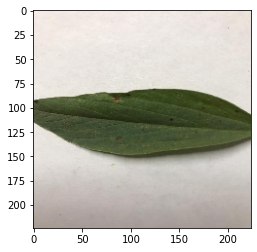

This image most likely belongs to 0 with a 40.38 percent confidence.


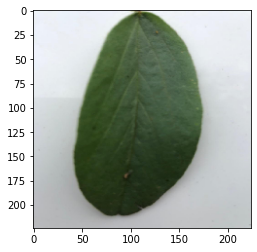

This image most likely belongs to 0 with a 40.38 percent confidence.


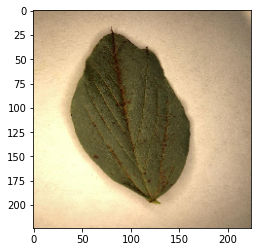

This image most likely belongs to 0 with a 40.38 percent confidence.


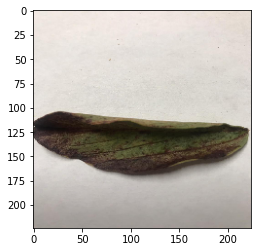

This image most likely belongs to 0 with a 40.38 percent confidence.


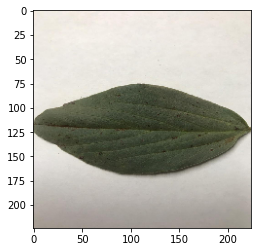

This image most likely belongs to 0 with a 40.38 percent confidence.


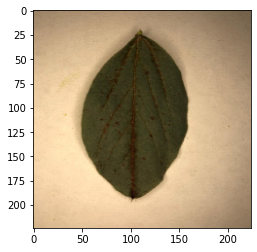

This image most likely belongs to 0 with a 40.38 percent confidence.


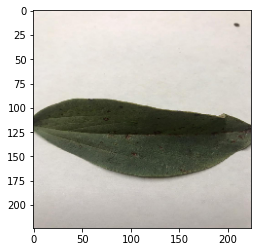

This image most likely belongs to 0 with a 40.38 percent confidence.


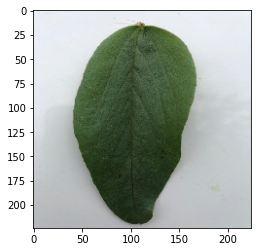

This image most likely belongs to 0 with a 40.38 percent confidence.


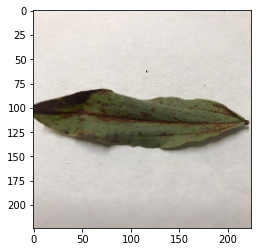

This image most likely belongs to 0 with a 40.38 percent confidence.


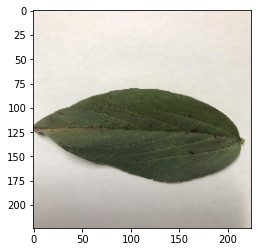

This image most likely belongs to 0 with a 40.38 percent confidence.


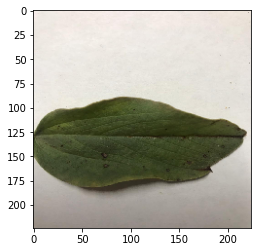

This image most likely belongs to 0 with a 40.38 percent confidence.


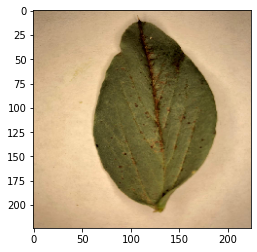

This image most likely belongs to 0 with a 40.38 percent confidence.


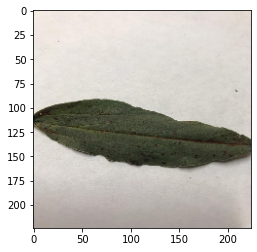

This image most likely belongs to 0 with a 40.38 percent confidence.


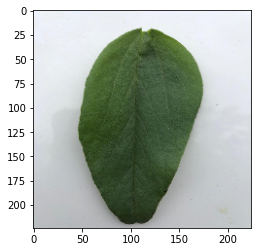

This image most likely belongs to 0 with a 40.38 percent confidence.


In [228]:
for i in os.listdir(dirPath):
    img = image.load_img(dirPath + '//' + i, target_size= (height, width))
    plt.imshow(img, cmap='ocean')
    plt.show()
    X = keras.preprocessing.image.img_to_array(img)
    X = tf.expand_dims(X, axis=0) # Create a batch
    images = np.concatenate([X])
    val = model.predict(images)
    score = tf.nn.softmax(predictions[0])
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)